In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
import math

In [3]:
df = pd.read_csv("../prices.txt", sep='\s+', header=None, index_col=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.78280,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
std,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.26656,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.01000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.91750,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.69000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
75%,14.582500,72.915000,47.800000,50.380000,56.720000,12.210000,18.410000,47.50250,68.912500,52.192500,...,32.302500,70.352500,13.232500,62.107500,37.602500,52.892500,61.855000,35.032500,43.525000,57.002500
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.09000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000


<Axes: ylabel='8'>

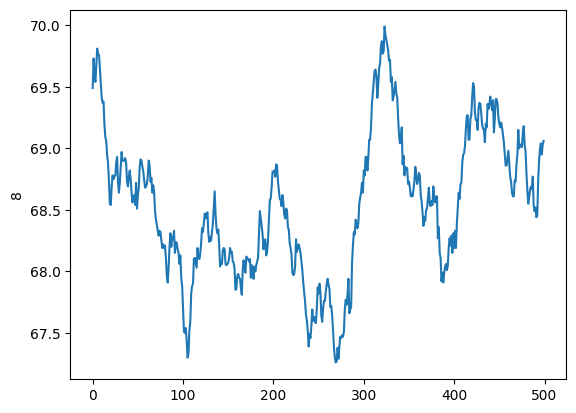

In [4]:
# Deal with 8
sns.lineplot(df[8])

In [8]:
# Check if stationary
# Non-stationary
def test_stationary(series):
    print("Results of Dickey-Fuller Test:")
    dftest = stattools.adfuller(series, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    print("Results of KPSS Test:")
    kpsstest = stattools.kpss(series, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

test_stationary(df[8])

Results of Dickey-Fuller Test:
Test Statistic                  -2.613868
p-value                          0.090165
#Lags Used                       2.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Results of KPSS Test:
Test Statistic            0.665248
p-value                   0.016705
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [30]:
df[8] - df[8].mean()

-1.9326762412674726e-15

In [31]:
# Best order for ARIMA: (2, 0, 0)
model8 = sm.tsa.arima.ARIMA(endog=(df[8] - df[8].mean()), order=(2, 0, 0))
res8 = model8.fit()
print(res8.summary())

                               SARIMAX Results                                
Dep. Variable:                      8   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 444.186
Date:                Sun, 23 Jun 2024   AIC                           -880.371
Time:                        00:47:58   BIC                           -863.513
Sample:                             0   HQIC                          -873.756
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1353      0.246      0.551      0.582      -0.346       0.617
ar.L1          1.0926      0.047     23.318      0.000       1.001       1.184
ar.L2         -0.1079      0.047     -2.301      0.0

In [37]:
residual = np.array(df[8][2:]) - (np.array(df[8][1:-1]) - 0.1353) * 1.0926 - (np.array(df[8][:-2]) - 0.1353) * -0.1079 - 0.1353
test_stationary(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.423929e+01
p-value                        1.547632e-26
#Lags Used                     1.000000e+00
Number of Observations Used    4.960000e+02
Critical Value (1%)           -3.443603e+00
Critical Value (5%)           -2.867385e+00
Critical Value (10%)          -2.569883e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.332357
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_25184\61105336.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")


In [38]:
print(res8.resid)
print(residual)

0      0.817387
1      0.251269
2     -0.139738
3     -0.031812
4      0.159721
         ...   
495    0.086214
496    0.034214
497   -0.088703
498    0.093945
499    0.026829
Length: 500, dtype: float64
[0.90890291 1.01683691 1.20836591 1.17892791 1.00199591 1.07065291
 0.94525791 0.96636991 0.95360791 1.03285091 1.07360691 0.86836491
 0.97703791 1.03579691 0.93778491 1.00565991 0.90826791 0.88568391
 1.05616691 1.19767091 1.12270191 1.01055291 1.07304191 1.05795291
 1.14918491 1.09100391 0.84716391 0.98107891 1.13783291 1.17071391
 1.15730791 0.97022291 1.05965291 1.05209991 1.07209991 1.01024791
 0.90610991 1.02568391 1.13320291 1.09147891 0.97548091 0.94735791
 0.97999091 1.09552991 1.06319391 0.96565791 1.23522391 0.81992391
 1.17879191 1.09594691 1.21225991 1.09299191 1.03577891 1.00317891
 1.01672991 0.98503891 0.99720491 1.06520791 1.06780791 1.11703491
 1.16271091 0.99915191 0.92580391 1.09352591 0.92672091 1.12106991
 0.98256591 0.90459591 0.99201191 1.01230891 0.99845991 1.0

In [19]:
test_stationary(res8.resid)

Results of Dickey-Fuller Test:
Test Statistic                -1.573778e+01
p-value                        1.266610e-28
#Lags Used                     1.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.14143
p-value                  0.10000
Lags Used                2.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_25184\61105336.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")
